<a href="https://colab.research.google.com/github/shomoitamitin/shomoitamitin/blob/main/Project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Saving kaggle.json to kaggle.json
 33% 5.00M/15.1M [00:00<00:00, 25.8MB/s]
100% 15.1M/15.1M [00:00<00:00, 59.9MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
      y.append((i[0:1]))
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
for i in range(1,99):
    y.append('N')

  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

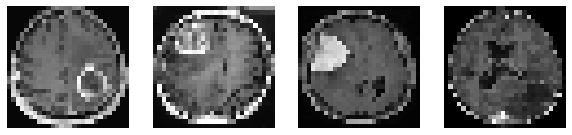

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (28, 28, 3)
Shape of an image in X_test:  (28, 28, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 28, 28, 3)
X_test Shape:  (84, 28, 28, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [ ]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (28,28,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (28, 28, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Dropout(0.25))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = m1.fit(X_train,y_train,epochs=50, validation_data=(X_test,y_test),verbose = 1,initial_epoch=0)

Epoch 1/50
6/6 [==============================] - 13s 106ms/step - loss: 0.6685 - accuracy: 0.5680 - val_loss: 2.5726 - val_accuracy: 0.6071
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6402 - accuracy: 0.6746 - val_loss: 1.9180 - val_accuracy: 0.6071
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6447 - accuracy: 0.6627 - val_loss: 0.9221 - val_accuracy: 0.6071
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6470 - accuracy: 0.6154 - val_loss: 0.7274 - val_accuracy: 0.6071
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 0.5638 - accuracy: 0.7633 - val_loss: 1.1735 - val_accuracy: 0.6071
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.5732 - accuracy: 0.6923 - val_loss: 0.9978 - val_accuracy: 0.6190
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.5408 - accuracy: 0.7633 - val_loss: 0.8570 - val_accuracy: 0.6190
Epoch 8/50
6/6 [=========

In [ ]:
history = m1.fit(X_train,y_train,
                    epochs=50, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5670 - val_accuracy: 0.8690
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5849 - val_accuracy: 0.8690
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0072 - accuracy: 0.9941 - val_loss: 0.8216 - val_accuracy: 0.8214
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.7596 - val_accuracy: 0.8452
Epoch 5/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6594 - val_accuracy: 0.8690
Epoch 6/50
6/6 [==============================] - 0s 21ms/step - loss: 9.9463e-04 - accuracy: 1.0000 - val_loss: 0.6202 - val_accuracy: 0.8690
Epoch 7/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6208 - val_accuracy: 0.8571
Epoch 8/50
6/6 [=======

3/3 [==============================] - 0s 5ms/step - loss: 0.7029 - accuracy: 0.8452


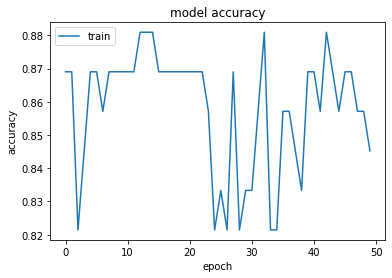

In [ ]:
m1.evaluate(X_test,y_test)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

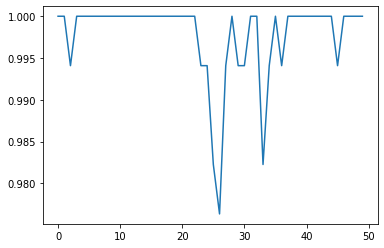

In [ ]:
plt.plot(history.history['accuracy'])

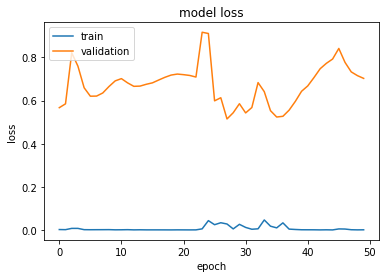

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

3/3 [==============================] - 0s 4ms/step


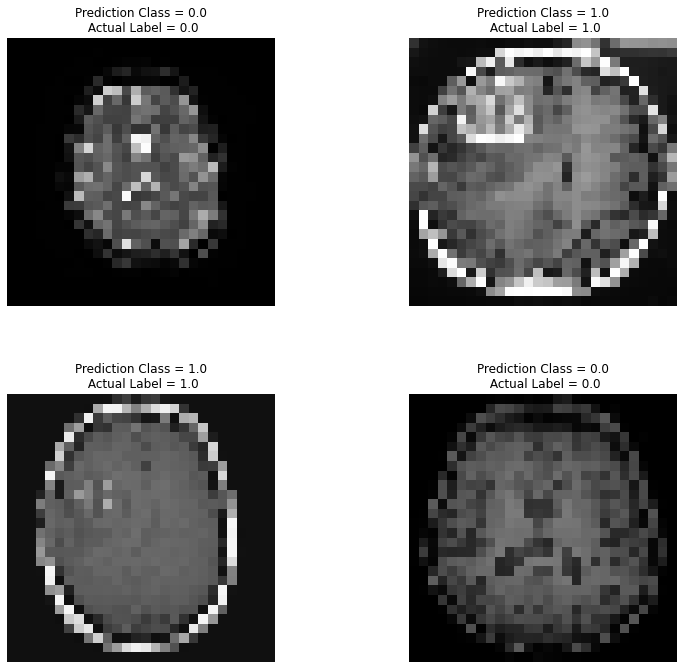

In [ ]:
y_predicted = np.argmax(m1.predict(X_test), axis=-1)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.87      0.88      0.87        51

    accuracy                           0.85        84
   macro avg       0.84      0.84      0.84        84
weighted avg       0.84      0.85      0.84        84

